# Machine Learning Lab 4, kNN College Retention Data

In [70]:
#code123 (for extra credit)
# Imports
import pandas as pd
import numpy as np 
#make sure to install sklearn in your terminal first!
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

## Phase 1: Question


### How good of a machine learning model can we build to predict student retainment?

In [71]:
#read in the college completion dataset, you should have this locally or you can use the URL linking to the class repo below

colcomp = pd.read_csv("C:/Users/Student/Downloads/cc_institution_details.csv", encoding='latin1')

colcomp.info() # Let's check the structure of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   unitid                                3798 non-null   int64  
 1   chronname                             3798 non-null   object 
 2   city                                  3798 non-null   object 
 3   state                                 3798 non-null   object 
 4   level                                 3798 non-null   object 
 5   control                               3798 non-null   object 
 6   basic                                 3798 non-null   object 
 7   hbcu                                  94 non-null     object 
 8   flagship                              50 non-null     object 
 9   long_x                                3798 non-null   float64
 10  lat_y                                 3798 non-null   float64
 11  site             

In [72]:
colcomp = colcomp.drop(
    ['med_sat_value', 'med_sat_percentile', 'long_x', 
     'lat_y', 'site', 'unitid', 'city',
     'nicknames', 'similar'], axis=1)

colcomp.drop(
    columns=colcomp.columns[[1, 9, 10, 12, 13, 14, 16, 17, 19, 21, 23, 25, 27, 29, 31] + list(range(32, 52))], inplace=True
)
colcomp.head()

,chronname,level,control,basic,hbcu,flagship,student_count,awards_per_value,exp_award_value,ft_pct,aid_value,endow_value,grad_100_value,grad_150_value,pell_value,retain_value,ft_fac_value,cohort_size
0,Alabama A&M University,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,4051,14.2,105331,93.8,7142.0,NaN,10.0,29.1,71.2,63.1,82.8,882.0
1,University of Alabama at Birmingham,4-year,Public,Research Universities--very high research acti...,NaN,NaN,11502,20.9,136546,72.7,6088.0,24136.0,29.4,53.5,35.1,80.2,92.4,1376.0
2,Amridge University,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,322,29.9,58414,62.7,2540.0,302.0,0.0,66.7,68.4,37.5,67.2,3.0
3,University of Alabama at Huntsville,4-year,Public,Research Universities--very high research acti...,NaN,NaN,5696,20.9,64418,74.4,6647.0,11502.0,16.5,48.4,32.8,81.0,65.5,759.0
4,Alabama State University,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,5356,11.6,132407,91.0,7256.0,13202.0,8.8,25.2,82.7,62.2,67.0,1351.0


In [73]:
colcomp['basic'] = colcomp.basic.astype('category')
colcomp['control'] = colcomp.control.astype('category')
colcomp['level'] = colcomp.level.astype('category')
colcomp['flagship']=[1 if colcomp['flagship'][i]=='X' else 0 for i in range(len(colcomp['hbcu']))]
colcomp['flagship'] = colcomp.flagship.astype('category')
colcomp['hbcu']= [1 if colcomp['hbcu'][i]=='X' else 0 for i in range(len(colcomp['hbcu']))]
colcomp['hbcu'] = colcomp.hbcu.astype('category')

colcomp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   chronname         3798 non-null   object  
 1   level             3798 non-null   category
 2   control           3798 non-null   category
 3   basic             3798 non-null   category
 4   hbcu              3798 non-null   category
 5   flagship          3798 non-null   category
 6   student_count     3798 non-null   int64   
 7   awards_per_value  3798 non-null   float64 
 8   exp_award_value   3798 non-null   int64   
 9   ft_pct            3794 non-null   float64 
 10  aid_value         3797 non-null   float64 
 11  endow_value       2323 non-null   float64 
 12  grad_100_value    3467 non-null   float64 
 13  grad_150_value    3467 non-null   float64 
 14  pell_value        3797 non-null   float64 
 15  retain_value      3535 non-null   float64 
 16  ft_fac_value      3785 n

c:\Users\Student\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


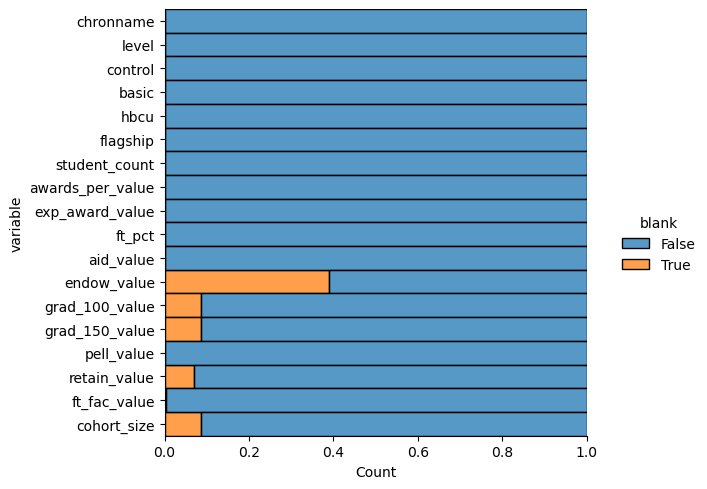

In [74]:
import seaborn as sns
sns.displot(
    data=colcomp.isna().melt(value_name="blank"),
    y="variable",
    hue="blank",
    multiple="fill",
    aspect=1.25
)

c:\Users\Student\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


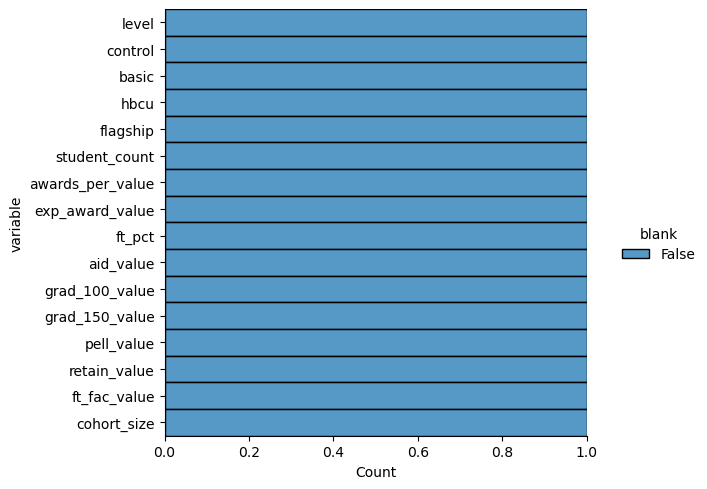

In [75]:
colcomp2 = colcomp.drop(['endow_value', 'chronname'], axis=1)
colcomp2.dropna(axis = 0, how = 'any', inplace = True)
sns.displot(
    data=colcomp2.isna().melt(value_name="blank"),
    y="variable",
    hue="blank",
    multiple="fill",
    aspect=1.25
)

In [76]:
ret_standardizing = StandardScaler().fit_transform(colcomp2[['retain_value']])
ret_standardizing[:10]

array([[-0.22508225],
       [ 0.84412891],
       [-1.82577264],
       [ 0.89415049],
       [-0.28135652],
       [ 1.2693123 ],
       [-1.50063241],
       [-0.21882955],
       [ 1.42562972],
       [ 0.85663431]])

In [77]:
ret_normalizing = MinMaxScaler().fit_transform(colcomp2[['retain_value']])
ret_normalizing[:10]

array([[0.631],
       [0.802],
       [0.375],
       [0.81 ],
       [0.622],
       [0.87 ],
       [0.427],
       [0.632],
       [0.895],
       [0.804]])

<Axes: ylabel='Density'>

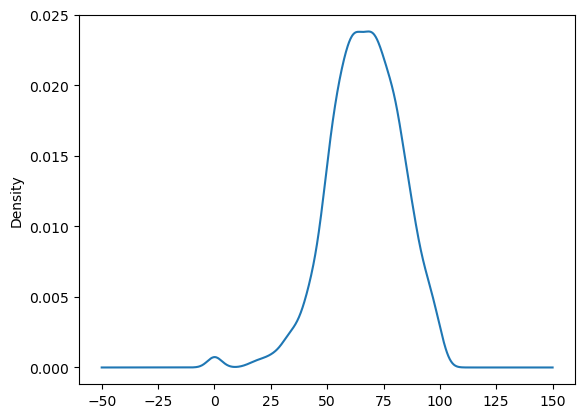

In [78]:
colcomp2.retain_value.plot.density()

<Axes: ylabel='Density'>

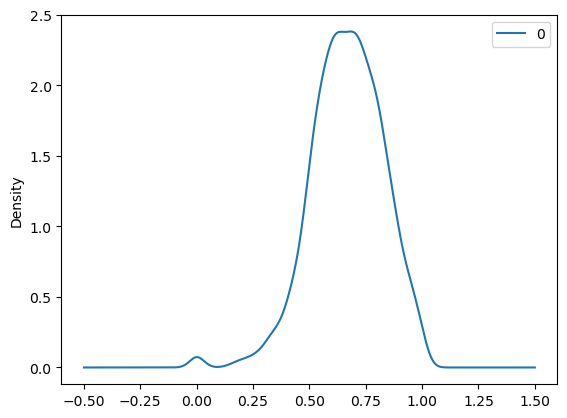

In [79]:
pd.DataFrame(ret_normalizing).plot.density()

In [80]:
num_listing = list(colcomp2.select_dtypes('number')) #select function to find the numeric variables and create a list  

colcomp2[num_listing] = MinMaxScaler().fit_transform(colcomp2[num_listing])
colcomp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3371 entries, 0 to 3796
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   level             3371 non-null   category
 1   control           3371 non-null   category
 2   basic             3371 non-null   category
 3   hbcu              3371 non-null   category
 4   flagship          3371 non-null   category
 5   student_count     3371 non-null   float64 
 6   awards_per_value  3371 non-null   float64 
 7   exp_award_value   3371 non-null   float64 
 8   ft_pct            3371 non-null   float64 
 9   aid_value         3371 non-null   float64 
 10  grad_100_value    3371 non-null   float64 
 11  grad_150_value    3371 non-null   float64 
 12  pell_value        3371 non-null   float64 
 13  retain_value      3371 non-null   float64 
 14  ft_fac_value      3371 non-null   float64 
 15  cohort_size       3371 non-null   float64 
dtypes: category(5), float64(11)
m

In [81]:
category_list = list(colcomp2.select_dtypes('category'))
ret_one_hot = pd.get_dummies(colcomp2, columns = category_list) 
ret_one_hot

,student_count,awards_per_value,exp_award_value,ft_pct,aid_value,grad_100_value,grad_150_value,pell_value,retain_value,ft_fac_value,...,basic_Schools of art- music- and design,basic_Schools of business and management,basic_Schools of engineering,basic_Schools of law,basic_Theological seminaries- Bible colleges- and other faith-related institutions,basic_Tribal Colleges,hbcu_0,hbcu_1,flagship_0,flagship_1
0,0.023677,0.104900,0.019941,0.935551,0.165867,0.100,0.291,0.712,0.631,0.828,...,False,False,False,False,False,False,False,True,True,False
1,0.067476,0.156202,0.025851,0.716216,0.140338,0.294,0.535,0.351,0.802,0.924,...,False,False,False,False,False,False,True,False,True,False
2,0.001758,0.225115,0.011059,0.612266,0.054401,0.000,0.667,0.684,0.375,0.672,...,False,False,False,False,False,False,True,False,True,False
3,0.033347,0.156202,0.012196,0.733888,0.153878,0.165,0.484,0.328,0.810,0.655,...,False,False,False,False,False,False,True,False,True,False
4,0.031348,0.084992,0.025067,0.906445,0.168629,0.088,0.252,0.827,0.622,0.670,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,0.000488,0.054364,0.023993,0.588358,0.106961,0.000,0.000,0.744,0.333,0.286,...,False,False,False,False,False,True,True,False,True,False
3793,0.000511,0.196784,0.004553,0.319127,0.110594,0.000,0.000,0.263,0.333,0.107,...,False,False,False,False,False,False,True,False,True,False
3794,0.000688,0.123277,0.020061,0.917879,0.220438,0.515,0.515,0.283,0.744,0.444,...,False,False,False,False,False,False,True,False,True,False
3795,0.002733,0.418070,0.010022,0.553015,0.072591,0.375,0.375,0.531,0.778,0.296,...,False,False,False,False,False,False,True,False,True,False


count    3371.000000
mean        0.666998
std         0.159955
min         0.000000
25%         0.564000
50%         0.671000
75%         0.781000
max         1.000000
Name: retain_value, dtype: float64

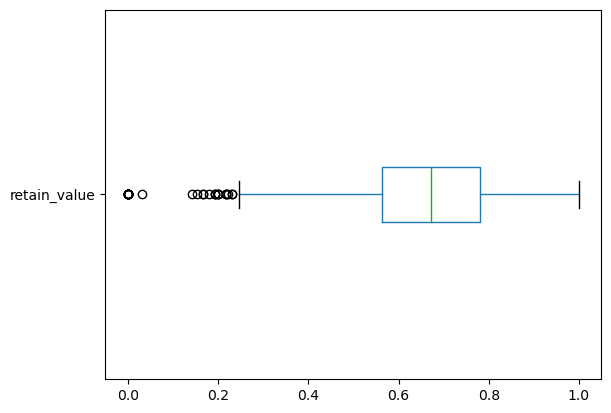

In [82]:
ret_one_hot.boxplot(column= 'retain_value', vert= False, grid=False)
ret_one_hot.retain_value.describe()

In [83]:
ret_one_hot['retain_value_f'] = pd.cut(ret_one_hot.retain_value, bins = [-1,0.781,1], labels =[0,1])
prevalence = ret_one_hot.retain_value_f.value_counts()[1]/len(ret_one_hot.retain_value_f)
prevalence

0.2491842183328389

In [85]:
new_ret = ret_one_hot.drop(['retain_value'],axis=1)

In [86]:
Train, Test = train_test_split(new_ret,  train_size = .8, stratify = new_ret.retain_value_f)
print(Train.shape)
print(Test.shape) 

(2696, 53)
(675, 53)


In [87]:
Tune, Test = train_test_split(Test,  train_size = .5, stratify= Test.retain_value_f)
print(Train.retain_value_f.value_counts())
print(672/(672+2024))

retain_value_f
0    2024
1     672
Name: count, dtype: int64
0.24925816023738873


In [88]:
print(Tune.retain_value_f.value_counts())
print(126/(380+126))

retain_value_f
0    253
1     84
Name: count, dtype: int64
0.2490118577075099


In [89]:
print(Test.retain_value_f.value_counts())
print(413/(413+1245))

retain_value_f
0    254
1     84
Name: count, dtype: int64
0.24909529553679133


## Phase 3: Building kNN Model for Student Retainment


In [90]:
prevalence = ret_one_hot.retain_value_f.value_counts()[1]/len(ret_one_hot.retain_value_f)
prevalence

0.2491842183328389

In [91]:
train, test = train_test_split(ret_one_hot,  test_size=0.4, stratify = ret_one_hot['retain_value_f'])
test, val = train_test_split(test, test_size=0.5, stratify= test['retain_value_f']) 

In [92]:
import random
random.seed(1984)   # kNN is a random algorithm, so we use `random.seed(x)` to make results repeatable

X_train = train.drop(['retain_value_f'], axis=1).values
y_train = train['retain_value_f'].values

neighb = KNeighborsClassifier(n_neighbors=9)
neighb.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [93]:
X_test = test.drop(['retain_value_f'], axis=1).values
y_test = test['retain_value_f'].values

neighb.score(X_test, y_test)

0.8694362017804155

In [94]:
X_val = val.drop(['retain_value_f'], axis=1).values
y_val = val['retain_value_f'].values

neighb.score(X_val, y_val)

0.8859259259259259

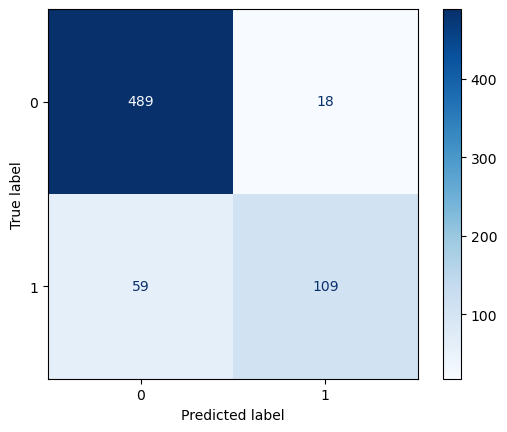

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(neighb, X_val, y_val, cmap = 'Blues') 
plt.show()

Our default threshold confusion matrix shows satisfactory performance. True negatives are accurately identified, with only a minor number of errors in false positives. However, the prediction of true positives and false negatives is suboptimal. This presents an issue as we aim to identify students at risk of not retaining information for timely intervention and support. Currently, our predictive accuracy in this regard is inadequate. Adjusting the threshold to minimize false negatives is crucial to enhancing our ability to identify students who may struggle with retention.

In [99]:
from sklearn.metrics import classification_report

y_val_pred = neighb.predict(X_val)
print(classification_report(y_val_pred, y_val))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       548
           1       0.65      0.86      0.74       127

    accuracy                           0.89       675
   macro avg       0.81      0.88      0.83       675
weighted avg       0.91      0.89      0.89       675



In [100]:
sensitivity = 109/(109+59)   # = TP/(TP+FN)
specificity = 485/(485+22)   # = TN/(TN+FP)
print(sensitivity, specificity)

0.6488095238095238 0.9566074950690335


In [101]:
def chooseK(k, X_train, y_train, X_test, y_test):
    random.seed(1)
    print("calculating... ", k, "k")    # I'll include this so you can see the progress of the function as it runs
    class_knn = KNeighborsClassifier(n_neighbors=k)
    class_knn.fit(X_train, y_train)
    
    # calculate accuracy
    accuracy = class_knn.score(X_test, y_test)
    return accuracy

In [102]:
test = pd.DataFrame({'k':list(range(1,22,2)), 
                     'accuracy':[chooseK(x, X_train, y_train, X_test, y_test) for x in list(range(1, 22, 2))]})

calculating...  1 k
calculating...  3 k
calculating...  5 k
calculating...  7 k
calculating...  9 k
calculating...  11 k
calculating...  13 k
calculating...  15 k
calculating...  17 k
calculating...  19 k
calculating...  21 k


In [103]:
test

,k,accuracy
0,1,0.888724
1,3,0.870920
2,5,0.875371
3,7,0.872404
4,9,0.869436
5,11,0.857567
6,13,0.859050
7,15,0.859050
8,17,0.851632
9,19,0.853116


In [104]:
test = test.sort_values(by=['accuracy'], ascending=False)
test

,k,accuracy
0,1,0.888724
2,5,0.875371
3,7,0.872404
1,3,0.870920
4,9,0.869436
6,13,0.859050
7,15,0.859050
5,11,0.857567
9,19,0.853116
8,17,0.851632


1 might be our ideal number for k but that isn't good because that means it severely overfits

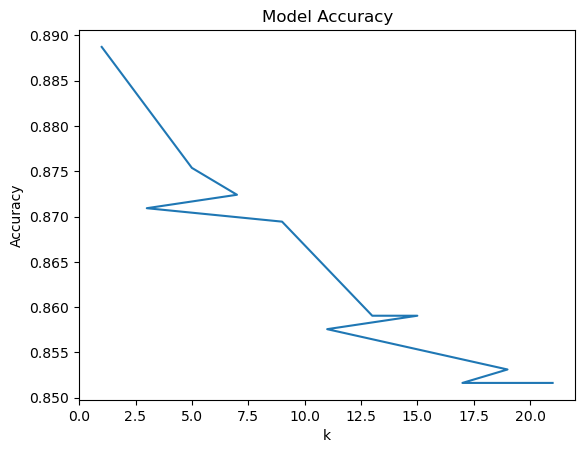

In [105]:
plt.plot(test['k'], test['accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [106]:
test_probs = neighb.predict_proba(X_test)
test_preds = neighb.predict(X_test)

In [107]:
test_probs = pd.DataFrame(test_probs, columns = ['not_retained_prob', 'retained_prob'])
test_probs

,not_retained_prob,retained_prob
0,1.000000,0.000000
1,0.111111,0.888889
2,1.000000,0.000000
3,1.000000,0.000000
4,1.000000,0.000000
...,...,...
669,0.000000,1.000000
670,0.777778,0.222222
671,1.000000,0.000000
672,1.000000,0.000000


In [108]:
finalmodel = pd.DataFrame({'actual_class': y_test.tolist(),
                           'pred_class': test_preds.tolist(),
                           'pred_prob': [test_probs['retained_prob'][i] if test_preds[i]==1 else test_probs['not_retained_prob'][i] for i in range(len(test_preds))]})

In [109]:
finalmodel.head()

,actual_class,pred_class,pred_prob
0,0,0,1.000000
1,0,1,0.888889
2,0,0,1.000000
3,0,0,1.000000
4,0,0,1.000000


In [110]:
finalmodel['pos_pred'] = [finalmodel.pred_prob[i] if finalmodel.pred_class[i]==1 else 1-finalmodel.pred_prob[i] for i in range(len(finalmodel.pred_class))]

In [111]:
finalmodel.head()

,actual_class,pred_class,pred_prob,pos_pred
0,0,0,1.000000,0.000000
1,0,1,0.888889,0.888889
2,0,0,1.000000,0.000000
3,0,0,1.000000,0.000000
4,0,0,1.000000,0.000000


In [112]:
finalmodel.actual_class = finalmodel.actual_class.astype('category')
finalmodel.pred_class = finalmodel.pred_class.astype('category')

c:\Users\Student\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


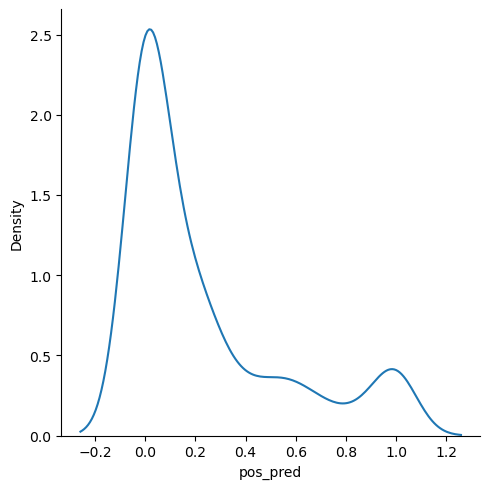

In [113]:
import seaborn as sns

sns.displot(finalmodel, x="pos_pred", kind="kde")

In [114]:
finalmodel.pos_pred.value_counts()

pos_pred
0.000000    321
0.111111     90
0.222222     79
1.000000     53
0.555556     31
0.333333     30
0.444444     24
0.666667     21
0.888889     14
0.777778     11
Name: count, dtype: int64

In [116]:
from sklearn.metrics import confusion_matrix

def adjust_thresh(x, y, z):
    """
    x=pred_probabilities
    y=threshold
    z=tune_outcome
    """
    thresh = pd.DataFrame({'new_preds': [1 if i > y else 0 for i in x]})
    thresh.new_preds = thresh.new_preds.astype('category')
    con_mat = confusion_matrix(z, thresh)  
    print(con_mat)

In [117]:
confusion_matrix(finalmodel.actual_class, finalmodel.pred_class)

array([[481,  25],
       [ 63, 105]], dtype=int64)

In [118]:
adjust_thresh(finalmodel.pos_pred, .4, finalmodel.actual_class)

[[468  38]
 [ 52 116]]


I think I want my final threshold to be around .4 because .4 minimizes both the false positives and false negatives.

In [119]:
adjust_thresh(finalmodel.pos_pred, .3, finalmodel.actual_class)

[[450  56]
 [ 40 128]]


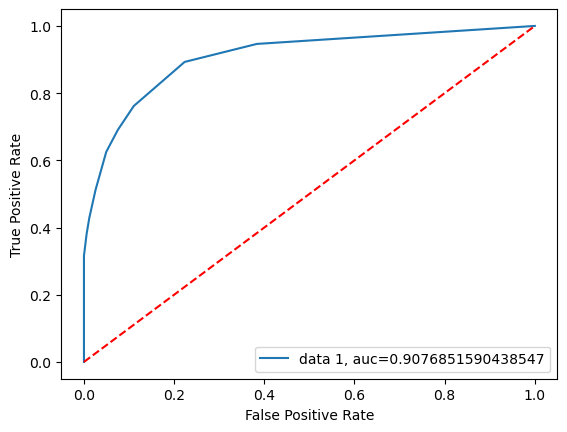

In [121]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, finalmodel.pos_pred)
auc = metrics.roc_auc_score(y_test, finalmodel.pos_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

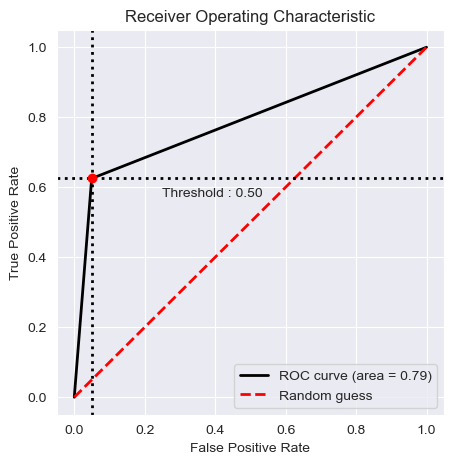

In [122]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test, finalmodel.pred_class, labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()